In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The label value is  6


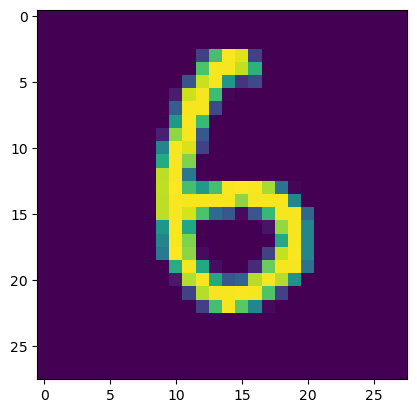

In [3]:
print("The label value is ",y_test[21])
plt.imshow(X_test[21])

The label value is  1


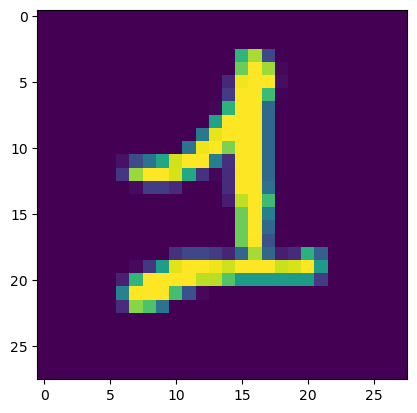

In [4]:
print("The label value is ",y_train[24])
plt.imshow(X_train[24])

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [6]:
number_of_classes= 10
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [7]:
print("After encoding the value 6 of y_test[21] become", y_test[21])

After encoding the value 6 of y_test[21] become [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
model= tf.keras.Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='accuracy',
                        patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                        patience=3,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5,batch_size=32,callbacks=callback)

Epoch 1/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.2282 - accuracy: 0.9496 - val_loss: 0.0736 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 2/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0788 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 3/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0889 - val_accuracy: 0.9752 - lr: 0.0010
Epoch 4/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.1016 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 5/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0292 - accuracy: 0.9913 - val_loss: 0.1021 - val_accuracy: 0.9776 - lr: 0.0010


In [13]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("loss & accuracy")
print(metrics)

loss & accuracy
[0.10206126421689987, 0.9775999784469604]


In [14]:
prediction=model.predict(X_test[:4])
print(np.argmax(prediction,axis=1))
print(y_test[:4])

1/1 [==============================] - 0s 116ms/step
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
model.save('digit-recognition.h5')

In [16]:
!tar -zcvf digit-recognition.tar digit-recognition.h5

a digit-recognition.h5


In [17]:
!pip install ibm_watson_machine_learning
!pip install watson-machine-learning-client

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.8/1.8 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 53.3/53.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 913.9/913.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 135.6/135.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.11.0-py3-none-any.whl size=73641 sha256=7629ebc129bb8bc64328ef358ce04db97c868f2e833b0dae758717744396cc67
  Stored in directory: c:\users\nithy\appdata\local\pip\cache\wheels\d3\a5\34\52d2e378d3d0446989ebcd214af8bad55beecf905258852b9f
  Create

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 538.9/538.9 kB 1.5 MB/s eta 0:00:00


In [18]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"3s71GhGAay6mKXDWofj2tQswtG0C4GsyZjv01-Qcgzor"
}
client = APIClient(credentials)
client

In [19]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/7345edf8b0f749aa88f640651c8f3e41:0f5aeccf-4b2d-49d5-aac5-e3f98468d9df::',
      'guid': '0f5aeccf-4b2d-49d5-aac5-e3f98468d9df',
      'name': 'Watson Machine Learning-9a',
      'type': 'machine_learning'}],
    'description': 'A novel method for handwritten digit recognition system',
    'name': 'IBM - PNT 2022TMID39257',
    'scope': {'bss_account_id': '7345edf8b0f749aa88f640651c8f3e41'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'f0bd540d-60c2-4d06-a1ae-8112af24c692',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'd1a17e9b31aa4ae188d80236ea30a341',
        'api_key': '4FudlLScA2YUZ4qEDrPfsqGg0LLgBbUZLtAsbrUjyu7I',
        'secret_access_key': '3fb6866c3d553cecb2a0c126077d00c88ee2407323aafc90',
        'service_id': 'ServiceId-19722712-4044-4046-80f2-6acc3d7e5c2b'},
       'editor': {

In [20]:
def guid_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [21]:
space_uid = guid_space_name(client,'IBM - PNT 2022TMID39257')
space_uid

'2b4eb3b8-bf93-4465-80d1-6d2f3fa74986'

In [22]:
client.set.default_space(space_uid)

'SUCCESS'

In [23]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [24]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [25]:
model_details = client.repository.store_model(model='digit-recognition.tar',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model repo",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [26]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-25T19:43:46.742Z',
  'id': '687c78db-8e40-4853-8239-1d78261b63b3',
  'modified_at': '2022-11-25T19:43:52.927Z',
  'name': 'CNN Digit recognition model repo',
  'owner': 'IBMid-6640044ANA',
  'resource_key': '6ff60751-a0b3-483b-907d-927f3fbbc929',
  'space_id': '2b4eb3b8-bf93-4465-80d1-6d2f3fa74986'},
 'system': {'warnings': []}}

In [27]:
model_id = client.repository.get_model_id(model_details)
model_id

'687c78db-8e40-4853-8239-1d78261b63b3'

In [28]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'C:\\Users\\nithy/DigitRecog_IBM_model.tar.gz'